# Exploratory Data Analysis (EDA) - Lap records in Formula 1

## Overview:

Exploratory Data Analysis (EDA) involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

Typically EDA steps include (but not limited to) the followings: 
* __Distribution of Data__: Examining the distribution of data points to understand their range, central tendencies (mean, median), and dispersion (variance, standard deviation).
* __Graphical Representations__: Utilizing charts such as histograms, box plots, scatter plots, and bar charts to visualize relationships within the data and distributions of variables.
* __Outlier Detection__: Identifying unusual values that deviate from other data points. Outliers can influence statistical analyses and might indicate data entry errors or unique cases.
* __Correlation Analysis__: Checking the relationships between variables to understand how they might affect each other. This includes computing correlation coefficients and creating correlation matrices.
* __Handling Missing Values__: Detecting and deciding how to address missing data points, whether by imputation or removal, depending on their impact and the amount of missing data.
* __Summary Statistics__: Calculating key statistics that provide insight into data trends and nuances.

However, in my EDA process, I would like to put the steps of "Outlier Detection" and "Handling Missing Values" in the next stage, so my EDA here only refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables.ces.uances.


## Datasets: Lap records in Formula 1

Formula 1 is well-known as the highest class of auto racing activity and the FIA Formula One World Championship has been one of the premier forms of racing around the world since its inaugural season in 1950. A Formula One season consists of a series of races, known as Grands Prix, which take place worldwide on purpose-built circuits and on public roads.

The dataset consists of all information on the Formula 1 races, drivers, constructors, qualifying, circuits, lap times, pit stops, championships from 1950 till the latest 2023 season.

Here, the datasets used here include:
* _lap_times_
* _pit_stops_
* _qualifying_
* _races_
* _results_
* _sprint_results_
* _status_

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sklearn as sk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact

## Exploratory Data Analysis (EDA)

### (1): Loading datasets - _lap_times_

In [2]:
df_raw_lap_times = pd.read_csv('../data/01-raw/lap_times.csv')  
print(df_raw_lap_times.shape)
df_raw_lap_times.columns

(551742, 6)


Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')

In [3]:
df_raw_lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


#### Summary Statistics

In [4]:
df_raw_lap_times.describe()

,raceId,driverId,lap,position,milliseconds
count,551742.000000,551742.000000,551742.000000,551742.000000,5.517420e+05
mean,564.878467,296.918785,29.990193,9.658699,9.570621e+04
std,425.883069,377.935897,18.420399,5.538011,7.478605e+04
min,1.000000,1.000000,1.000000,1.000000,5.540400e+04
25%,131.000000,15.000000,14.000000,5.000000,8.199300e+04
50%,846.000000,39.000000,29.000000,9.000000,9.067300e+04
75%,976.000000,817.000000,44.000000,14.000000,1.022430e+05
max,1110.000000,858.000000,87.000000,24.000000,7.507547e+06


In [5]:
df_raw_lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


#### Distribution of Data

<Axes: ylabel='Frequency'>

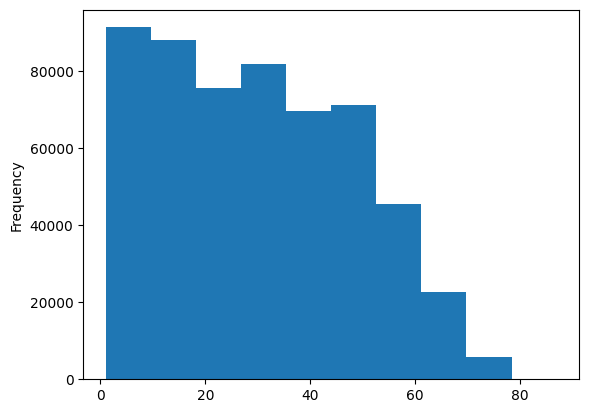

In [6]:
df_raw_lap_times['lap'].plot.hist()

### (2): Loading datasets - _pit_stops_

In [7]:
df_raw_pit_stops = pd.read_csv('../data/01-raw/pit_stops.csv')
print(df_raw_pit_stops.shape)
df_raw_pit_stops.columns

(10089, 7)


Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')

In [8]:
df_raw_pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


#### Summary Statistics

In [9]:
df_raw_pit_stops.describe()

,raceId,driverId,stop,lap,milliseconds
count,10089.000000,10089.000000,10089.000000,10089.000000,1.008900e+04
mean,962.774011,523.998910,1.759738,25.312023,7.534863e+04
std,81.144375,389.698555,0.916282,14.729775,2.788588e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,888.000000,18.000000,1.000000,13.000000,2.191400e+04
50%,958.000000,815.000000,2.000000,25.000000,2.357000e+04
75%,1035.000000,831.000000,2.000000,36.000000,2.620200e+04
max,1110.000000,858.000000,6.000000,78.000000,3.069017e+06


In [10]:
df_raw_pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


#### Graphical Representations

<Axes: ylabel='Density'>

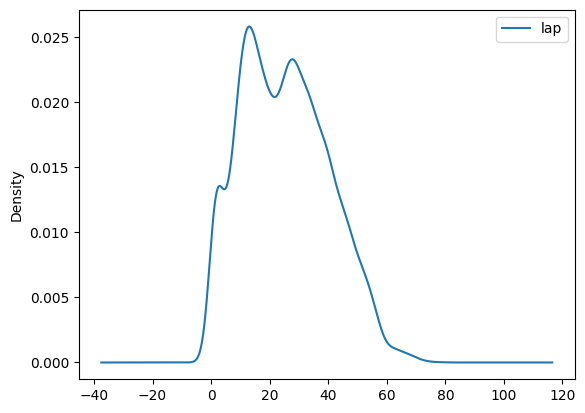

In [11]:
df_raw_pit_stops[['lap', 'duration']].plot.kde()

### (3): Loading datasets - _qualifying_

In [12]:
df_raw_qualifying = pd.read_csv('../data/01-raw/qualifying.csv')  
print(df_raw_qualifying.shape)
df_raw_qualifying.columns

(9815, 9)


Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')

In [13]:
df_raw_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


#### Summary Statistics

In [14]:
df_raw_qualifying.describe()

,qualifyId,raceId,driverId,constructorId,number,position
count,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000
mean,4920.076108,589.809985,314.514519,44.783597,18.114519,11.244931
std,2847.637640,421.207023,381.264736,70.843628,17.859565,6.290625
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2455.500000,119.500000,16.000000,4.000000,7.000000,6.000000
50%,4910.000000,856.000000,50.000000,9.000000,14.000000,11.000000
75%,7383.500000,981.000000,818.000000,28.000000,22.000000,17.000000
max,9872.000000,1110.000000,858.000000,214.000000,99.000000,28.000000


In [15]:
df_raw_qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
dtypes: int64(6), object(3)
memory usage: 690.2+ KB


### (4): Loading datasets - _races_

In [16]:
df_raw_races = pd.read_csv('../data/01-raw/races.csv')  
print(df_raw_races.shape)
df_raw_races.columns

(1101, 18)


Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [17]:
df_raw_races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


#### Summary Statistics

In [18]:
df_raw_races.describe()

,raceId,year,round,circuitId
count,1101.000000,1101.000000,1101.000000,1101.000000
mean,553.355132,1992.020890,8.494096,23.700272
std,321.425790,20.296406,5.081089,19.346014
min,1.000000,1950.000000,1.000000,1.000000
25%,276.000000,1976.000000,4.000000,9.000000
50%,551.000000,1994.000000,8.000000,18.000000
75%,826.000000,2010.000000,12.000000,34.000000
max,1120.000000,2023.000000,22.000000,80.000000


In [19]:
df_raw_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


### (5): Loading datasets - results

In [20]:
df_raw_results = pd.read_csv('../data/01-raw/results.csv')  
print(df_raw_results.shape)
df_raw_results.columns

(26080, 18)


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [21]:
df_raw_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


#### Summary Statistics

In [22]:
df_raw_results.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


In [23]:
df_raw_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

#### Correlation Analysis

In [24]:
df_raw_results[['resultId', 'constructorId']].corr()

,resultId,constructorId
resultId,1.000000,0.444353
constructorId,0.444353,1.000000


### (6): Loading datasets - _sprint_results_

In [25]:
df_raw_sprint_results = pd.read_csv('../data/01-raw/sprint_results.csv')  
print(df_raw_sprint_results.shape)
df_raw_sprint_results.columns

(180, 16)


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'fastestLapTime', 'statusId'],
      dtype='object')

In [26]:
df_raw_sprint_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


#### Summary Statistics

In [27]:
df_raw_sprint_results.describe()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,90.500000,1085.666667,714.088889,95.500000,27.550000,10.100000,10.500000,1.300000,19.216667,3.983333
std,52.105662,17.362388,298.112841,88.359632,24.273874,5.861626,5.782366,2.318013,5.469341,17.662091
min,1.000000,1061.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,45.750000,1071.000000,817.000000,6.000000,10.000000,5.000000,5.750000,0.000000,17.000000,1.000000
50%,90.500000,1084.000000,840.000000,84.000000,20.000000,10.000000,10.500000,0.000000,21.000000,1.000000
75%,135.250000,1101.000000,847.000000,210.000000,44.000000,15.000000,15.250000,2.000000,24.000000,1.000000
max,180.000000,1110.000000,858.000000,214.000000,99.000000,20.000000,20.000000,8.000000,24.000000,130.000000


In [28]:
df_raw_sprint_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        180 non-null    int64 
 1   raceId          180 non-null    int64 
 2   driverId        180 non-null    int64 
 3   constructorId   180 non-null    int64 
 4   number          180 non-null    int64 
 5   grid            180 non-null    int64 
 6   position        180 non-null    object
 7   positionText    180 non-null    object
 8   positionOrder   180 non-null    int64 
 9   points          180 non-null    int64 
 10  laps            180 non-null    int64 
 11  time            180 non-null    object
 12  milliseconds    180 non-null    object
 13  fastestLap      180 non-null    object
 14  fastestLapTime  180 non-null    object
 15  statusId        180 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 22.6+ KB


#### Correlation Analysis

In [29]:
df_raw_sprint_results[['resultId', 'raceId', 'driverId', 'constructorId']].corr()

,resultId,raceId,driverId,constructorId
resultId,1.000000,9.880356e-01,0.106625,3.156205e-02
raceId,0.988036,1.000000e+00,0.107619,-2.827577e-16
driverId,0.106625,1.076188e-01,1.000000,-1.879993e-01
constructorId,0.031562,-2.827577e-16,-0.187999,1.000000e+00


### (7): Loading datasets - _status_

In [30]:
df_raw_status = pd.read_csv('../data/01-raw/status.csv')  
print(df_raw_status.shape)
df_raw_status.columns

(139, 2)


Index(['statusId', 'status'], dtype='object')

In [31]:
df_raw_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


#### Summary Statistics

In [32]:
df_raw_status.describe()

,statusId
count,139.000000
mean,71.237410
std,41.092434
min,1.000000
25%,35.500000
50%,72.000000
75%,106.500000
max,141.000000


In [33]:
df_raw_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


#### Graphical Representations

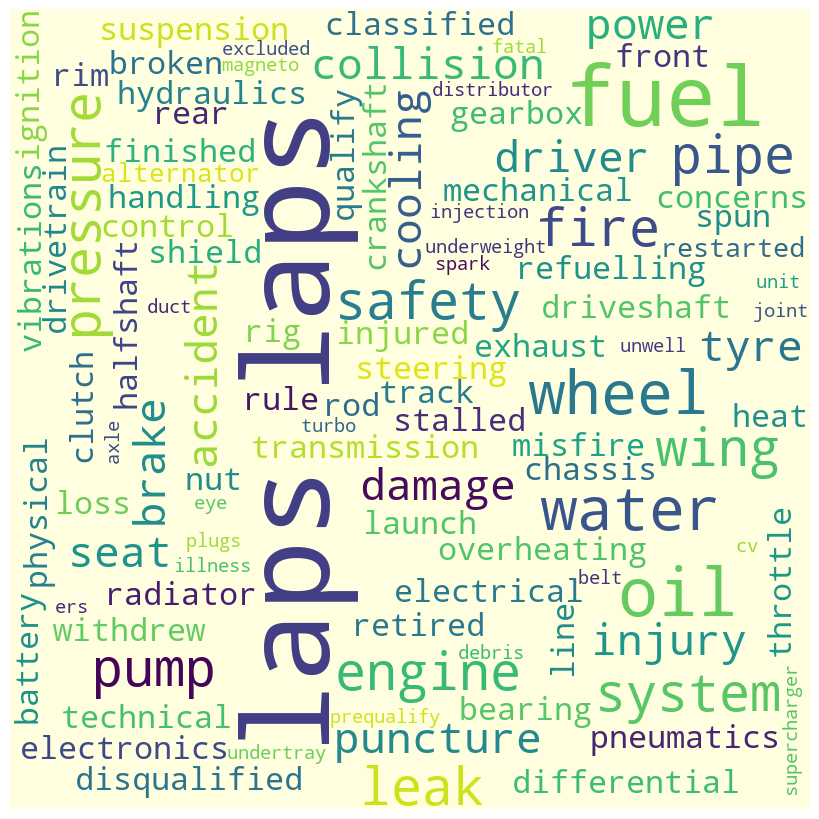

In [34]:
status_words = ''
stopwords = set(STOPWORDS)

for val in df_raw_status.status:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    status_tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(status_tokens)):
        status_tokens[i] = status_tokens[i].lower()
     
    status_words += " ".join(status_tokens)+" "
 
status_words += " ".join(status_tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, \
                      background_color ='lightyellow', \
                      stopwords = stopwords, \
                      min_font_size = 10).generate(status_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()